In [1]:
require(ggplot2)

Loading required package: ggplot2


In [2]:
setwd("~/Documents/Miami_WBD/")

In [4]:
c=read.csv("filtered_otutable.csv", h=T, row.names=1)

In [7]:
s=read.csv("Miami_map.csv", h=T, as.is=T)

In [8]:
b=t(c)
d=cbind.data.frame(s,b)

In [9]:
head(d)

,Sample_name,Disease_state,rep,101015,1011502,101152,101218,1015518,101620,1018359,⋯,New.ReferenceOTU989,New.ReferenceOTU99,New.ReferenceOTU990,New.ReferenceOTU993,New.ReferenceOTU994,New.ReferenceOTU995,New.ReferenceOTU996,New.ReferenceOTU997,New.ReferenceOTU998,New.ReferenceOTU999
D7,D7,Diseased,seven,0,63,0,13,1,0,0,⋯,6,12,4,0,5,6,36,14,0,0
D9,D9,Diseased,nine,0,18,0,0,0,0,0,⋯,5,9,0,0,0,8,1,0,0,0
D8,D8,Diseased,eight,0,47,0,0,15,0,0,⋯,8,12,5,0,42,23,383,0,0,0
D6,D6,Diseased,six,0,220,0,0,0,0,1,⋯,3,20,0,0,26,3,215,0,0,1
H9,H9,Healthy,nine,0,0,48,0,0,0,1,⋯,0,0,13,1,0,40,0,0,0,0
H6,H6,Healthy,six,0,0,29,0,0,6,0,⋯,0,0,3,0,0,11,0,0,7,0


In [18]:
t= read.csv("rep_set_tax_assignments_silva_clean2.csv", header=FALSE)

In [20]:
colnames(t)=c("OTUID", "kingdom", "phylum", "class", "order", "family", "genus", "species", "evalue", "ref")

In [21]:
c1=t(c)
c1per=(c1/rowSums(c1))*100
b1=t(c1per)

In [33]:
tcofg=t[,c("OTUID","class", "order", "family", "genus")]

In [34]:
b1t=merge(b1, tcofg, by.x="row.names", by.y="OTUID")

In [24]:
b1tc=b1t
b1tc$family=NULL
b1tc$order=NULL
b1tc$Row.names=NULL

In [25]:
b1to=b1t
b1to$family=NULL
b1to$class=NULL
b1to$Row.names=NULL

In [26]:
b1tf=b1t
b1tf$class=NULL
b1tf$order=NULL
b1tf$Row.names=NULL

In [35]:
b1tg=b1t
b1tg$family=NULL
b1tg$class=NULL
b1tg$order=NULL
b1tg$Row.names=NULL

In [42]:
b1tcagg=aggregate(. ~ class, data=b1tc, FUN=sum)
b1tfagg=aggregate(. ~ family, data=b1tf, FUN=sum)
b1toagg=aggregate(. ~ order, data=b1to, FUN=sum)
b1tgagg=aggregate(. ~ genus, data=b1tg, FUN=sum)

In [1]:
b1tcagg10=b1tcagg[apply(b1tcagg[,2:NCOL(b1tcagg)], MARGIN=1, function(x) any(x>10)),]
b1tfagg10=b1tfagg[apply(b1tfagg[,2:NCOL(b1tfagg)], MARGIN=1, function(x) any(x>10)),]
b1toagg10=b1toagg[apply(b1toagg[,2:NCOL(b1toagg)], MARGIN=1, function(x) any(x>5)),]
b1tgagg10=b1tgagg[apply(b1tgagg[,2:NCOL(b1tgagg)], MARGIN=1, function(x) any(x>10)),]

ERROR: Error in eval(expr, envir, enclos): object 'b1tcagg' not found


In [75]:
row.names(b1toagg10)=b1toagg10$order
b1toagg10=b1toagg10[2:NCOL(b1toagg10)]
b1toagg10=t(b1toagg10)

ofull = data.frame(Samples= numeric(0), Counts= integer(0), Taxonomy = character(0))

for (i in 1:ncol(b1toagg10)) {
  fams=data.frame("Samples"=row.names(b1toagg10), 
                  "Counts"=b1toagg10[,i], "Taxonomy"=colnames(b1toagg10)[i])
  ofull=rbind(ofull,fams)
}

In [76]:
fulldat=merge(ofull, s, by.x="Samples", by.y="Sample_name", all.x=TRUE)

ggplotColours =function(n=8, h=c(0, 360) +15){
  if ((diff(h)%%360) < 1) h[2] <- h[2] - 360/n
  hcl(h = (seq(h[1], h[2], length = n)), c = 100, l = 65)
}

In [53]:
plotfamilyalltime=ggplot(data=fulldat, aes(x=rep, y=Taxonomy )) +
  geom_point(aes(size=Counts,color=Taxonomy)) +
  scale_colour_discrete(guide=FALSE)+
  scale_size_continuous(range=c(0,16), name="Percent") + theme_bw()+theme(legend.position = "left") +
  ggtitle("Microbiomes of Healthy and Diseased Corals from Miami")
plotfamilyalltime=plotfamilyalltime  + xlab("Pair") + ylab("Family") +
  theme(axis.text.y = element_text(color=ggplotColours(n=5)))+ facet_grid (Disease_state~., scales="free_x") 

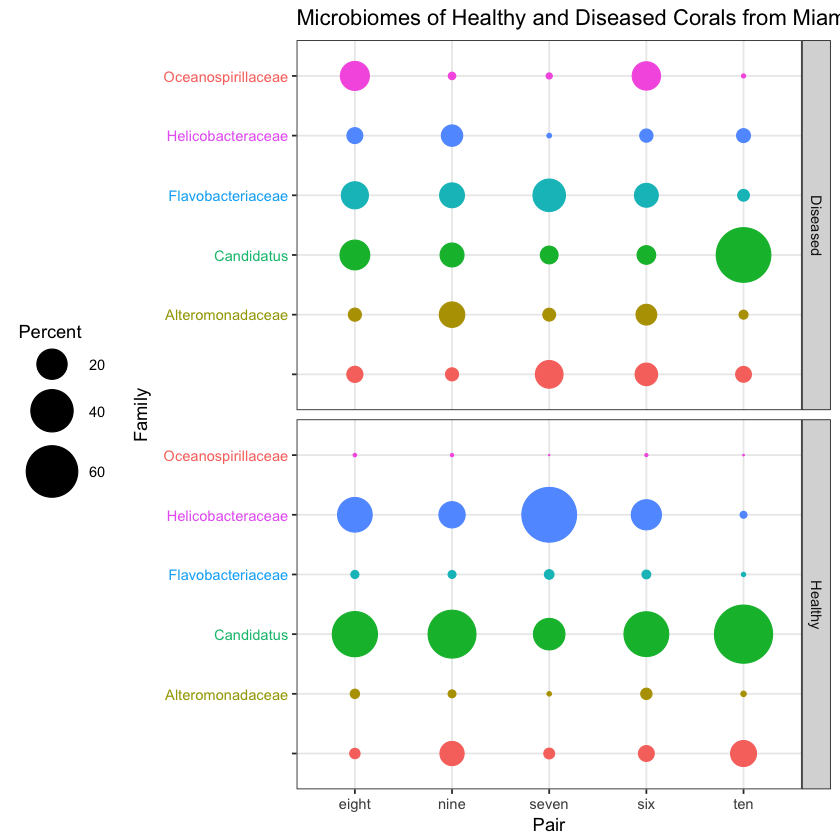

In [55]:
plotfamilyalltime

In [79]:
plotorderalltime=ggplot(data=fulldat, aes(x=rep, y=Taxonomy )) +
  geom_point(aes(size=Counts,color=Taxonomy)) +
  scale_colour_discrete(guide=FALSE)+
  scale_size_continuous(range=c(0,16), name="Percent") + theme_bw()+theme(legend.position = "left") +
  ggtitle("Microbiomes of Healthy and Diseased Corals from Miami")
plotorderalltime=plotorderalltime  + xlab("Pair") + ylab("Order") +
  theme(axis.text.y = element_text(color=ggplotColours(n=24)))+ facet_grid (Disease_state~., scales="free_x") 

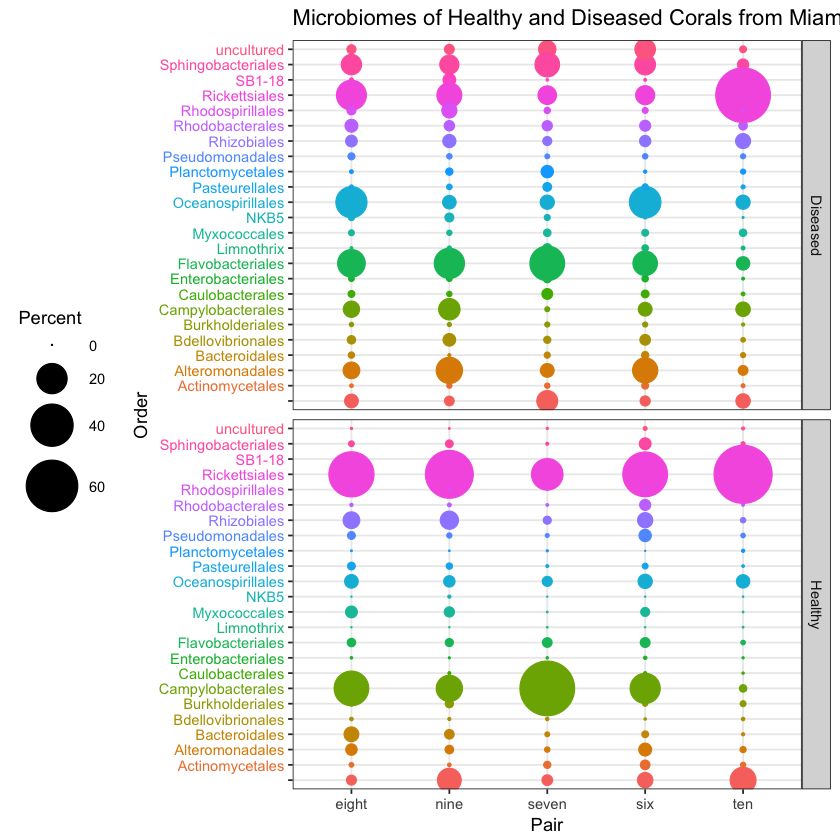

In [80]:
plotorderalltime